# K-Means
Вы научитесь:

    использовать алгоритм K-Means
    работать с задачами обучения без учителя
    работать с изображениям в Python

Введение

Самый распространенный тип задач машинного обучения — это задачи обучения с учителем. В них имеется обучающая выборка, для каждого объекта которой есть ответ, и нужно научиться предсказывать эти ответы для новых объектов. В такой постановке можно строго определить критерии качества.

Если же имеются лишь объекты, а ответов для них нет, то все равно можно пытаться найти в данных некую структуру. Задачи, которые ищут закономерности в неразмеченных выборках, называют задачами обучения без учителя. Типичный пример такой задачи — кластеризация, где требуется найти группы похожих объектов.

Кластеризация может использоваться для самых разных целей. В этом задании мы попробуем группировать схожие пиксели на изображении. Такой подход позволяет переходить к суперпиксельному представлению изображений, которое является более компактным и лучше подходит для решения ряда задач компьютерного зрения.

Реализация в sklearn

Алгоритм KMeans реализован в классе sklearn.cluster.KMeans. Так как это один из примеров unsupervised-задачи, для обучения достаточно передать только матрицу объектов.

В качестве метрики будем использовать PSNR — адаптация метрики MSE для задачи нахождениях сходства изображений.

Для работы с изображениями мы рекомендуем воспользоваться пакетом scikit-image. Чтобы загрузить изображение, необходимо выполнить следующую команду:

    from skimage.io import imread
    image = imread('parrots_4.jpg')
    
После этих действий переменная image будет содержать изображение в виде numpy-массива размера n * m * 3, где n и m соответствуют размерам изображения, а 3 соответствует формату представления RGB.

Если вы хотите вывести изображение на экран, необходимо, чтобы у вас была установлена библиотека matplotlib. С помощью нее это делается следующим образом:
    
    import pylab
    pylab.imshow(image)

Если вы работаете в ipython-notebook'е, то вам необходимо перед выполнением кода выше исполнить в любой ячейке инструкцию:
    
    %matplotlib inline

Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [1]:
from skimage.io import imread
image = imread('parrots.jpg')

In [3]:
import matplotlib

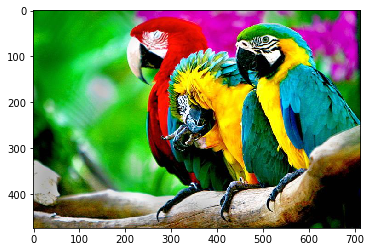

In [6]:
import pylab
pylab.imshow(image)
matplotlib.pylab.show()

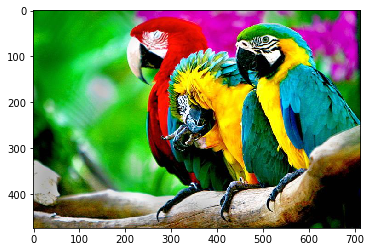

In [73]:
pylab.imshow(img_float)
matplotlib.pylab.show()

In [8]:
from skimage import img_as_float
img_float = img_as_float(image)

In [14]:
print(img_float.shape, image.shape, image[0][1][2] / img_float[0][1][2])

(474, 713, 3) (474, 713, 3) 255.0


Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [16]:
X = img_float.reshape((img_float.shape[0] * img_float.shape[1], img_float.shape[2]))

In [19]:
print(X.shape, X[0], img_float[0][0])

(337962, 3) [ 0.01568627  0.49411765  0.01960784] [ 0.01568627  0.49411765  0.01960784]


Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [20]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(init='k-means++', random_state=241)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [28]:
labels = kmeans.labels_

In [29]:
import numpy as np

In [30]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [62]:
def find_PSNR(I, K):
    n, m, k = I.shape
    mse = 1 / (n * m * k) * \
    np.sum([[[(I[i][j][c] - K[i][j][c]) ** 2 
              for c in range(k)] 
             for j in range(m)] 
            for i in range(n)])
    psnr = - 10 * np.log10(mse)
    return psnr

In [63]:
find_PSNR(np.array([[[0, 0, 0]]]), np.array([[[1, 0, 0]]]))

4.7712125471966251

In [70]:
new_values = np.zeros((np.unique(labels).shape[0], 3))
for k in np.unique(labels):
    new_values[k] = [np.mean([X[j][i] for j in range(X.shape[0]) if labels[j] == k]) for i in range(3)]

In [71]:
new_values

array([[ 0.05398472,  0.11669131,  0.05040297],
       [ 0.78777653,  0.82313175,  0.797932  ],
       [ 0.95426915,  0.82763029,  0.04108553],
       [ 0.45195586,  0.66671227,  0.44141216],
       [ 0.09564693,  0.63556673,  0.06691699],
       [ 0.61234112,  0.21470826,  0.06361929],
       [ 0.77703777,  0.09105093,  0.69018671],
       [ 0.04566487,  0.55159858,  0.59899031]])

In [75]:
X_new = np.array([[new_values[labels[i]][j] for j in range(3)]for i in range(X.shape[0])])

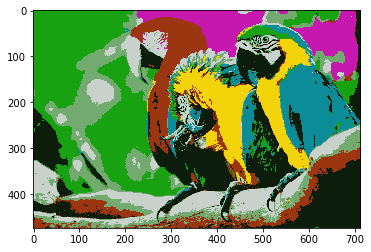

In [79]:
pylab.imshow(X_new.reshape(image.shape))
matplotlib.pylab.show()

## Автоматизируем

In [87]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
import pylab

def find_PSNR(I, K):
    n, m, k = I.shape
    mse = 1 / (n * m * k) * \
    np.sum([[[(I[i][j][c] - K[i][j][c]) ** 2 
              for c in range(k)] 
             for j in range(m)] 
            for i in range(n)])
    psnr = - 10 * np.log10(mse)
    return psnr

def approx_rgb_float_picture(img_float, n_clusters = 8, func_approx = np.mean):
    X = img_float.reshape((img_float.shape[0] * img_float.shape[1], img_float.shape[2]))
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241, n_jobs=-1)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    new_values = np.zeros((n_clusters, 3))
    for k in np.unique(labels):
        new_values[k] = [func_approx([X[i][j] for i in range(X.shape[0]) if labels[i] == k]) for j in range(3)]
        
    X_new = np.array([[new_values[labels[i]][j] for j in range(3)] for i in range(X.shape[0])])
    img_float_new = X_new.reshape(img_float.shape)
    
    psnr = find_PSNR(img_float, img_float_new)
    pylab.title('n_clusters = ' + str(n_clusters) + ' psnr: ' + str(round(psnr, 1)) + ' func = ' + str(func_approx))
    pylab.imshow(img_float_new)
    matplotlib.pylab.show()
    return psnr

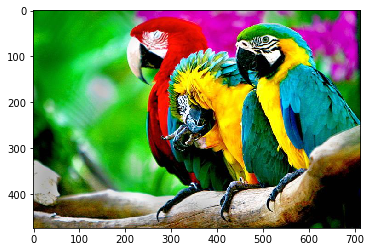

In [88]:
pylab.imshow(img_float)
matplotlib.pylab.show()

In [97]:
def find_need_clusters(img_float, thresh_func, step = 1):
    i = 1
    psnr = 0
    while (not thresh_func(psnr)):
        psnr = np.max((psnr, approx_rgb_float_picture(img_float, n_clusters=i, func_approx=np.mean)))
        psnr = np.max((psnr, approx_rgb_float_picture(img_float, n_clusters=i, func_approx=np.median)))
        i += step
    return i - step

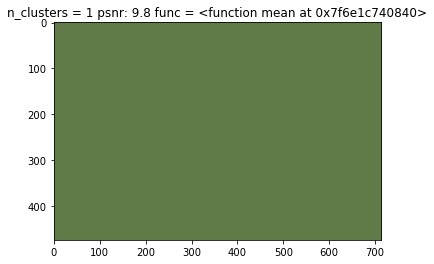

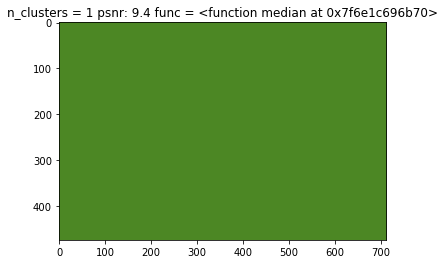

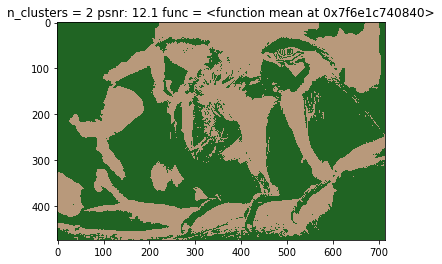

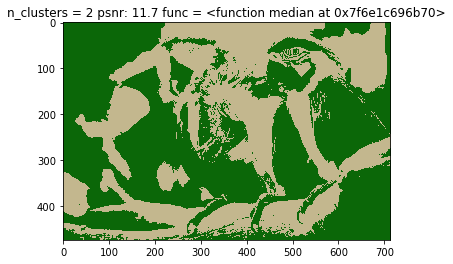

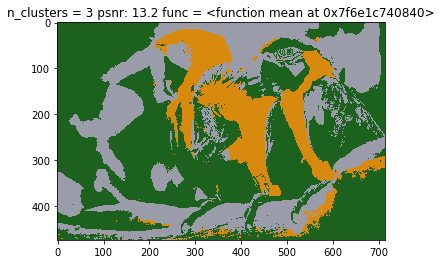

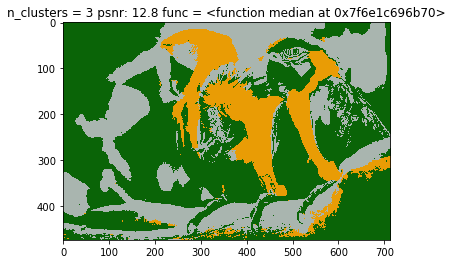

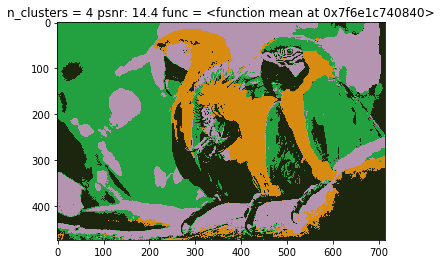

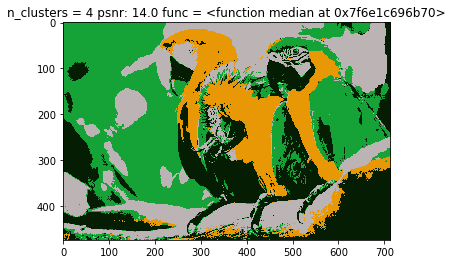

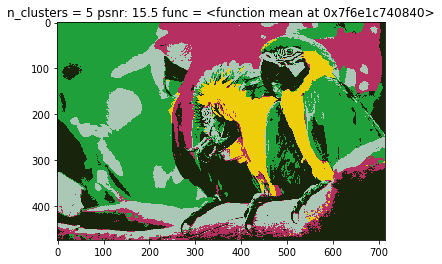

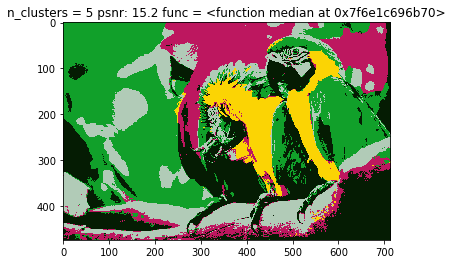

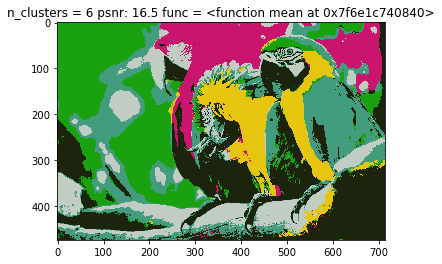

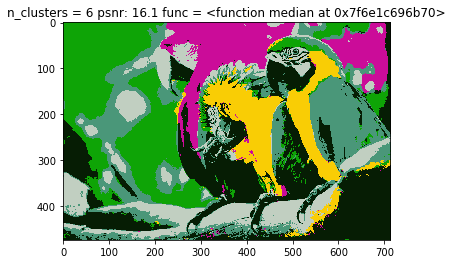

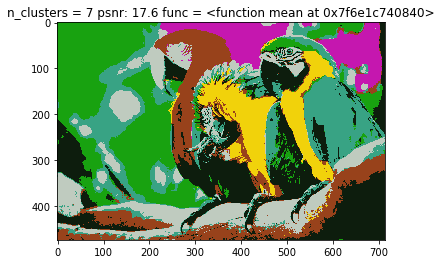

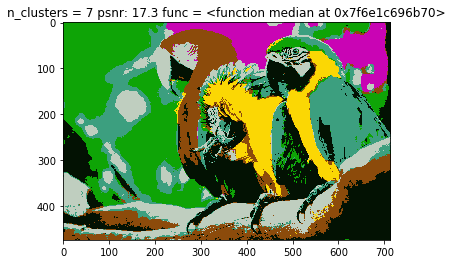

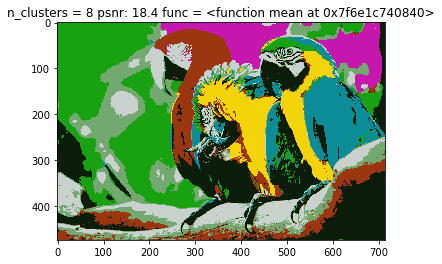

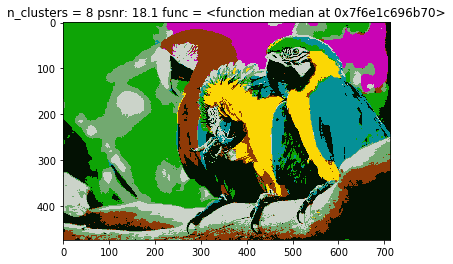

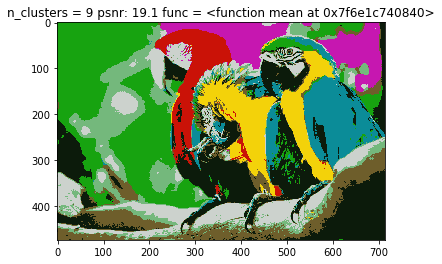

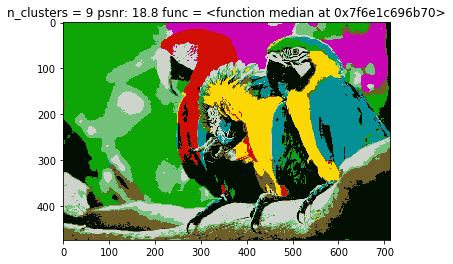

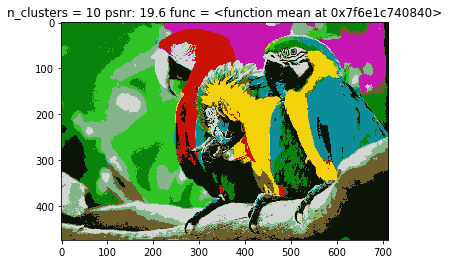

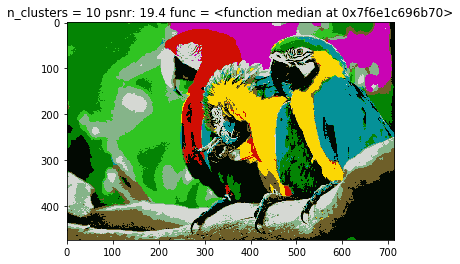

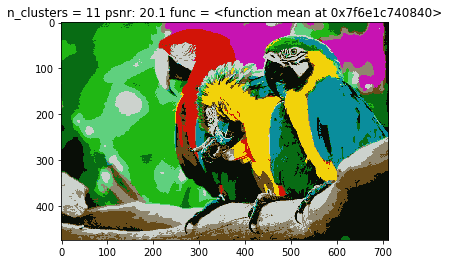

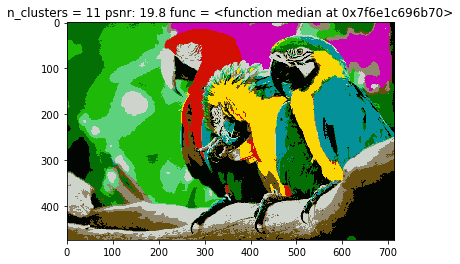

In [98]:
thresh_func = lambda x: x > 20
need_clusters = find_need_clusters(img_float, thresh_func, 1)

In [99]:
str(np.mean)

'<function mean at 0x7f6e1c740840>'

In [100]:
np.max((11, 1))

11

In [101]:
with open('k-means-ans.txt', 'w') as f:
    f.write(str(need_clusters))
!cat k-means-ans.txt

11